In [2]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('input/dw23_vs_wness_list.txt', sep=' ')

df.head()

IOError: File input/dw23_vs_wness_list.txt does not exist

In [3]:
print len(df)
print len(df[(df['arm'] == 0) & (df['charge'] == 0)])

6000
1500


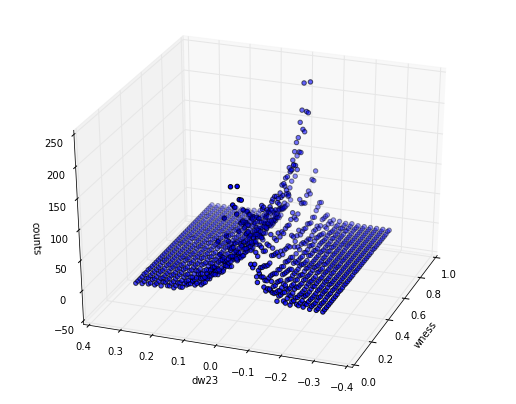

In [6]:
df2 = df[(df['arm'] == 0) & (df['charge'] == 0) & (df['wness_bin_center'] > .1) & (df['wness_bin_center'] < .9)]
wness = df2['wness_bin_center'].values
dw23 = df2['dw23_bin_center'].values
entries = df2['entries'].values


plt.figure(num=1, figsize=(9, 7)) 
ax = plt.subplot(projection='3d')
ax.scatter(wness, dw23, entries)
ax.view_init(elev=30, azim=-160)
ax.set_xlabel('wness')
ax.set_ylabel('dw23')
ax.set_zlabel('counts')

In [7]:
df3 = df[(df['arm'] == 0) & (df['charge'] == 0) & (df['wness_bin_center'] > .1) & (df['wness_bin_center'] < .9)]
df2 = df3[(df3['wness_bin_center'] > .1) & (df3['wness_bin_center'] < .3)].groupby('dw23_bin_center').agg(np.sum)['entries']
df4 = df3[(df3['wness_bin_center'] > .3) & (df3['wness_bin_center'] < .5)].groupby('dw23_bin_center').agg(np.sum)['entries']
df6 = df3[(df3['wness_bin_center'] > .5) & (df3['wness_bin_center'] < .7)].groupby('dw23_bin_center').agg(np.sum)['entries']
df8 = df3[(df3['wness_bin_center'] > .7) & (df3['wness_bin_center'] < .9)].groupby('dw23_bin_center').agg(np.sum)['entries']

print df2

dw23_bin_center
-0.29       1
-0.27       6
-0.25       9
-0.23      11
-0.21      21
-0.19      18
-0.17      42
-0.15      60
-0.13      88
-0.11     128
-0.09     245
-0.07     389
-0.05     782
-0.03    1265
-0.01    1171
 0.01     726
 0.03     487
 0.05     269
 0.07     188
 0.09      84
 0.11      82
 0.13      52
 0.15      26
 0.17      13
 0.19      12
 0.21      11
 0.23       7
 0.25       7
 0.27       4
 0.29       2
Name: entries, dtype: int64


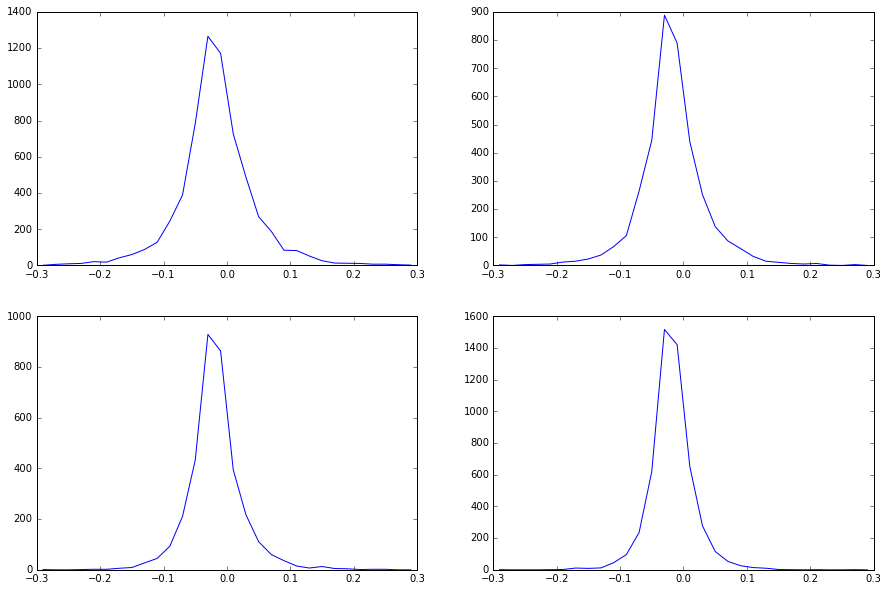

In [8]:
fig, ax = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
ax[0, 0].plot(df2)
ax[0, 1].plot(df4)
ax[1, 0].plot(df6)
ax[1, 1].plot(df8)


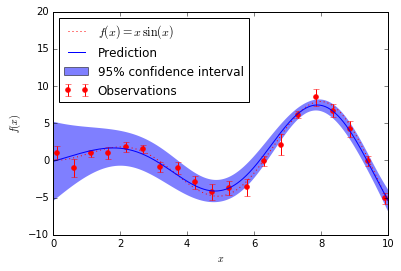

In [9]:
import numpy as np
from sklearn.gaussian_process import GaussianProcess
from matplotlib import pyplot as pl

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

#----------------------------------------------------------------------
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instanciate a Gaussian Process model
gp = GaussianProcess(corr='squared_exponential', theta0=1e-1,
                     thetaL=1e-3, thetaU=1,
                     nugget=(dy / y) ** 2,
                     random_start=100)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, MSE = gp.predict(x, eval_MSE=True)
sigma = np.sqrt(MSE)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = pl.figure()
pl.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
pl.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
pl.plot(x, y_pred, 'b-', label=u'Prediction')
pl.fill(np.concatenate([x, x[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
pl.xlabel('$x$')
pl.ylabel('$f(x)$')
pl.ylim(-10, 20)
pl.legend(loc='upper left')

pl.show()

In [10]:
print 'X', X.shape
print 'x', x.shape
print 'y', y.shape
print 'dy', dy.shape

X (20, 1)
x (1000, 1)
y (20,)
dy (20,)


In [11]:
dfcuts = df[(df['arm'] == 0) & 
            (df['charge'] == 0) & 
            (df['wness_bin_center'] > .1) & 
            (df['wness_bin_center'] < .9)]
            #(df['dw23_bin_center'] > -.1) & 
            #(df['dw23_bin_center'] < .1)]

X = dfcuts[['wness_bin_center', 'dw23_bin_center']].values
y = dfcuts['entries'].values
dy = np.sqrt(y)

nugget = (dy / y) ** 2
inds = np.where(np.isnan(nugget))
nugget[inds] = 1.0


print X.shape, y.shape, dy.shape

n = 20

for i in range(0, len(nugget)/n):
    for j in range(0, n):
        print '%.2f'%nugget[j+i*n],
    print ''

(1200, 2) (1200,) (1200,)
1.00 1.00 1.00 0.33 0.17 0.33 0.13 0.17 0.05 0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.01 0.02 0.04 0.06 
0.06 0.10 0.20 0.50 0.25 0.50 0.50 0.50 1.00 1.00 1.00 1.00 0.50 0.20 1.00 0.20 1.00 0.09 0.07 0.06 
0.02 0.02 0.01 0.01 0.01 0.01 0.02 0.02 0.04 0.10 0.13 0.13 1.00 0.50 1.00 0.20 1.00 1.00 1.00 1.00 
1.00 1.00 1.00 1.00 1.00 0.33 0.20 0.11 0.10 0.06 0.03 0.02 0.01 0.01 0.01 0.01 0.02 0.03 0.06 0.11 
0.14 0.20 0.25 0.33 1.00 1.00 1.00 0.50 0.50 1.00 1.00 1.00 1.00 1.00 1.00 0.25 0.14 0.11 0.13 0.08 
0.03 0.03 0.01 0.01 0.01 0.02 0.02 0.04 0.04 0.14 0.07 0.17 0.25 1.00 1.00 1.00 0.50 1.00 1.00 1.00 
1.00 1.00 1.00 1.00 0.25 1.00 0.50 0.17 0.14 0.05 0.05 0.03 0.01 0.01 0.01 0.01 0.03 0.04 0.05 0.11 
0.13 0.20 0.50 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 0.50 1.00 0.50 1.00 0.33 0.11 0.25 0.11 
0.06 0.03 0.01 0.01 0.01 0.01 0.03 0.05 0.05 0.10 0.20 0.25 0.25 0.50 1.00 1.00 1.00 1.00 1.00 1.00 
1.00 1.00 1.00 1.00 1.00 1.00 0.17 0.33 0.20 0.14 0.06 0.03 0.02 

In [12]:
# Instanciate a Gaussian Process model
gp = GaussianProcess(corr='squared_exponential', theta0=1e-1,
                     thetaL=1e-5, thetaU=10,
                     nugget=nugget,
                     random_start=100,
                     verbose=True)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

Performing Maximum Likelihood Estimation of the autocorrelation parameters...
The chosen optimizer is: fmin_cobyla
100 random starts are required.
5 completed
10 completed
15 completed
20 completed
25 completed
30 completed
35 completed
40 completed
45 completed
50 completed
55 completed
60 completed
65 completed
70 completed
75 completed
80 completed
85 completed
90 completed
95 completed


GaussianProcess(beta0=None,
        corr=<function squared_exponential at 0x7f3f50ef8848>,
        normalize=True, nugget=array([ 1.,  1., ...,  1.,  1.]),
        optimizer='fmin_cobyla', random_start=100,
        random_state=<mtrand.RandomState object at 0x7f3f741a9290>,
        regr=<function constant at 0x7f3f50ef8488>, storage_mode='full',
        theta0=array([[ 0.1]]), thetaL=array([[  1.00000e-05]]),
        thetaU=array([[10]]), verbose=True)

In [13]:
print X.shape
x = []
for w in np.arange(.11, .9, .02):
    for d in np.arange(-.29, .31, .005):
        x.append([w, d])
        
        
x = np.array(x)
print x.shape

(1200, 2)
(4800, 2)


In [14]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, MSE = gp.predict(x, eval_MSE=True)
sigma = np.sqrt(MSE)

In [15]:
dfp = pd.DataFrame({'wness': x[:,0], 'dw23': x[:,1], 'entries': y_pred, 'sigma': sigma})

df2p = dfp[(dfp['wness'] > .1) & (dfp['wness'] < .3)].groupby('dw23').agg(np.sum)['entries']
df4p = dfp[(dfp['wness'] > .3) & (dfp['wness'] < .5)].groupby('dw23').agg(np.sum)['entries']
df6p = dfp[(dfp['wness'] > .5) & (dfp['wness'] < .7)].groupby('dw23').agg(np.sum)['entries']
df8p = dfp[(dfp['wness'] > .7) & (dfp['wness'] < .9)].groupby('dw23').agg(np.sum)['entries']

df2ps = dfp[(dfp['wness'] > .1) & (dfp['wness'] < .3)].groupby('dw23').agg(np.sum)['sigma']
df4ps = dfp[(dfp['wness'] > .3) & (dfp['wness'] < .5)].groupby('dw23').agg(np.sum)['sigma']
df6ps = dfp[(dfp['wness'] > .5) & (dfp['wness'] < .7)].groupby('dw23').agg(np.sum)['sigma']
df8ps = dfp[(dfp['wness'] > .7) & (dfp['wness'] < .9)].groupby('dw23').agg(np.sum)['sigma']

'''
np.concatenate([X, X[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
        '''

"\nnp.concatenate([X, X[::-1]]),\n        np.concatenate([y_pred - 1.9600 * sigma,\n                       (y_pred + 1.9600 * sigma)[::-1]]),\n        alpha=.5, fc='b', ec='None', label='95% confidence interval')\n        "

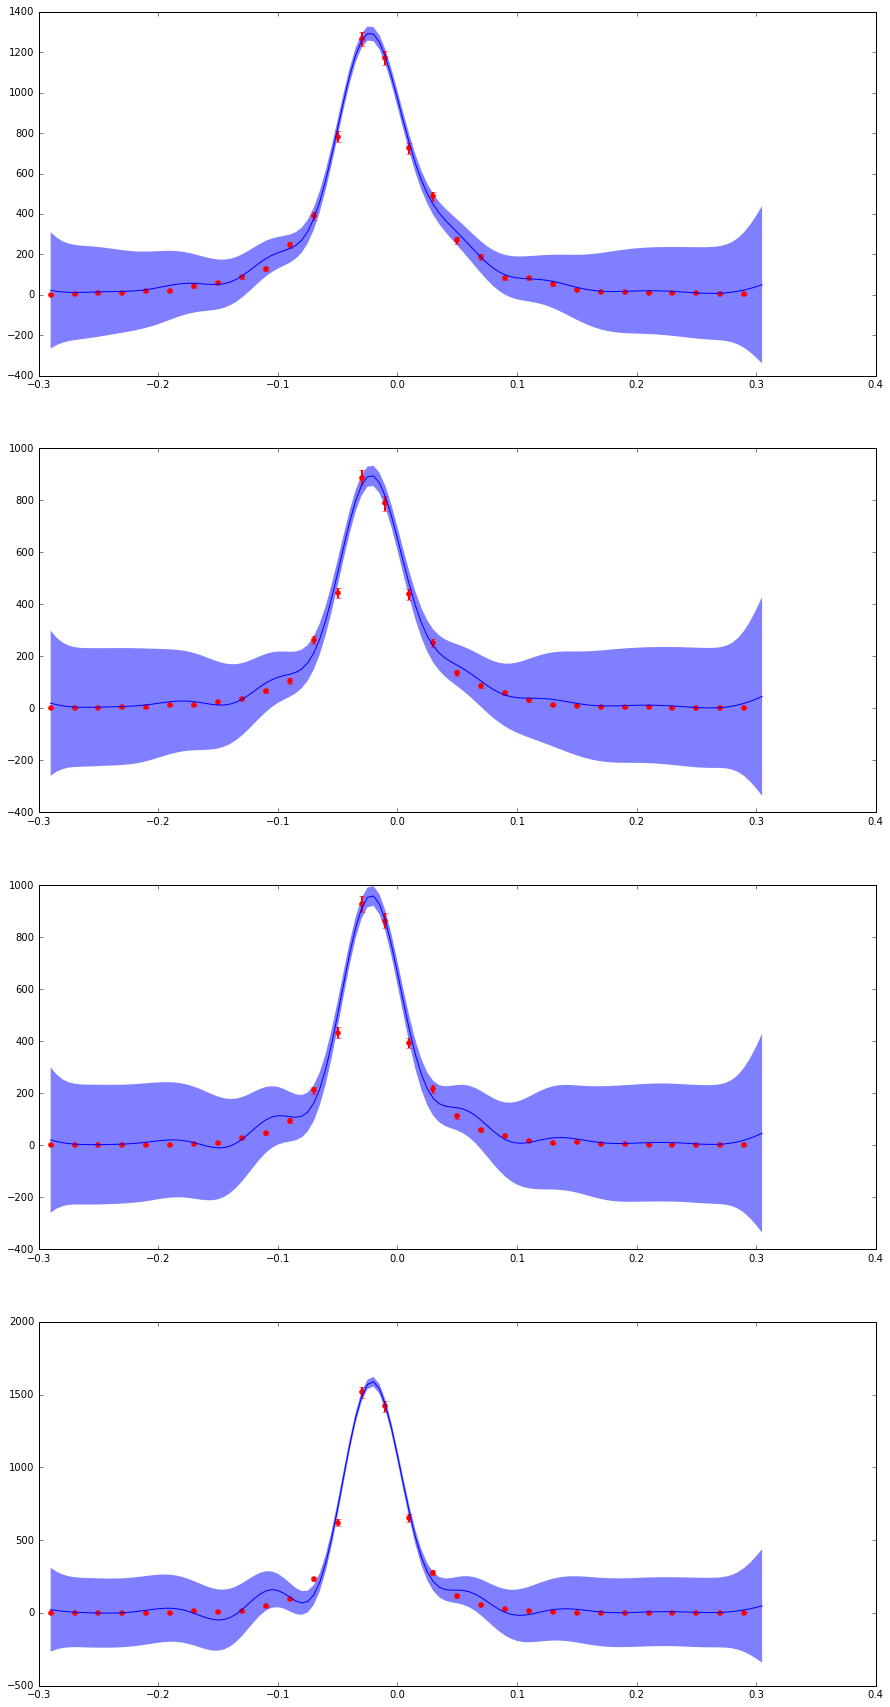

In [16]:
fig, ax = plt.subplots(4)
fig.set_figheight(30)
fig.set_figwidth(15)
ax[0].errorbar(df2.index.values, df2.values, np.sqrt(df2).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[0].plot(df2p)
ax[0].fill(np.concatenate([df2ps.index.values, df2ps.index.values[::-1]]),
              np.concatenate([df2p - 1.9600 * df2ps,
                       (df2p + 1.9600 * df2ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
ax[1].errorbar(df4.index.values, df4.values, np.sqrt(df4).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[1].plot(df4p)
ax[1].fill(np.concatenate([df4ps.index.values, df4ps.index.values[::-1]]),
              np.concatenate([df4p - 1.9600 * df4ps,
                       (df4p + 1.9600 * df4ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
ax[2].errorbar(df6.index.values, df6.values, np.sqrt(df6).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[2].plot(df6p)
ax[2].fill(np.concatenate([df6ps.index.values, df6ps.index.values[::-1]]),
              np.concatenate([df6p - 1.9600 * df6ps,
                       (df6p + 1.9600 * df6ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
ax[3].errorbar(df8.index.values, df8.values, np.sqrt(df8).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[3].plot(df8p)
ax[3].fill(np.concatenate([df8ps.index.values, df8ps.index.values[::-1]]),
              np.concatenate([df8p - 1.9600 * df8ps,
                       (df8p + 1.9600 * df8ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')

In [18]:
x = []
for w in np.arange(.1+.01, 1+.01, .02):
    for d in np.arange(-.3+.0025, .3+.0025, .005):
        x.append([w, d])
x = np.array(x)
y_pred2, MSE2 = gp.predict(x, eval_MSE=True)

sigma2 = np.sqrt(MSE2)

dfp = pd.DataFrame({'wness': x[:,0], 'dw23': x[:,1], 'entries': y_pred2, 'sigma': sigma2})
df9p = dfp[(dfp['wness'] > .9) & (dfp['wness'] < 1)].groupby('dw23').agg(np.sum)['entries']
df9ps = dfp[(dfp['wness'] > .9) & (dfp['wness'] < 1)].groupby('dw23').agg(np.sum)['sigma']

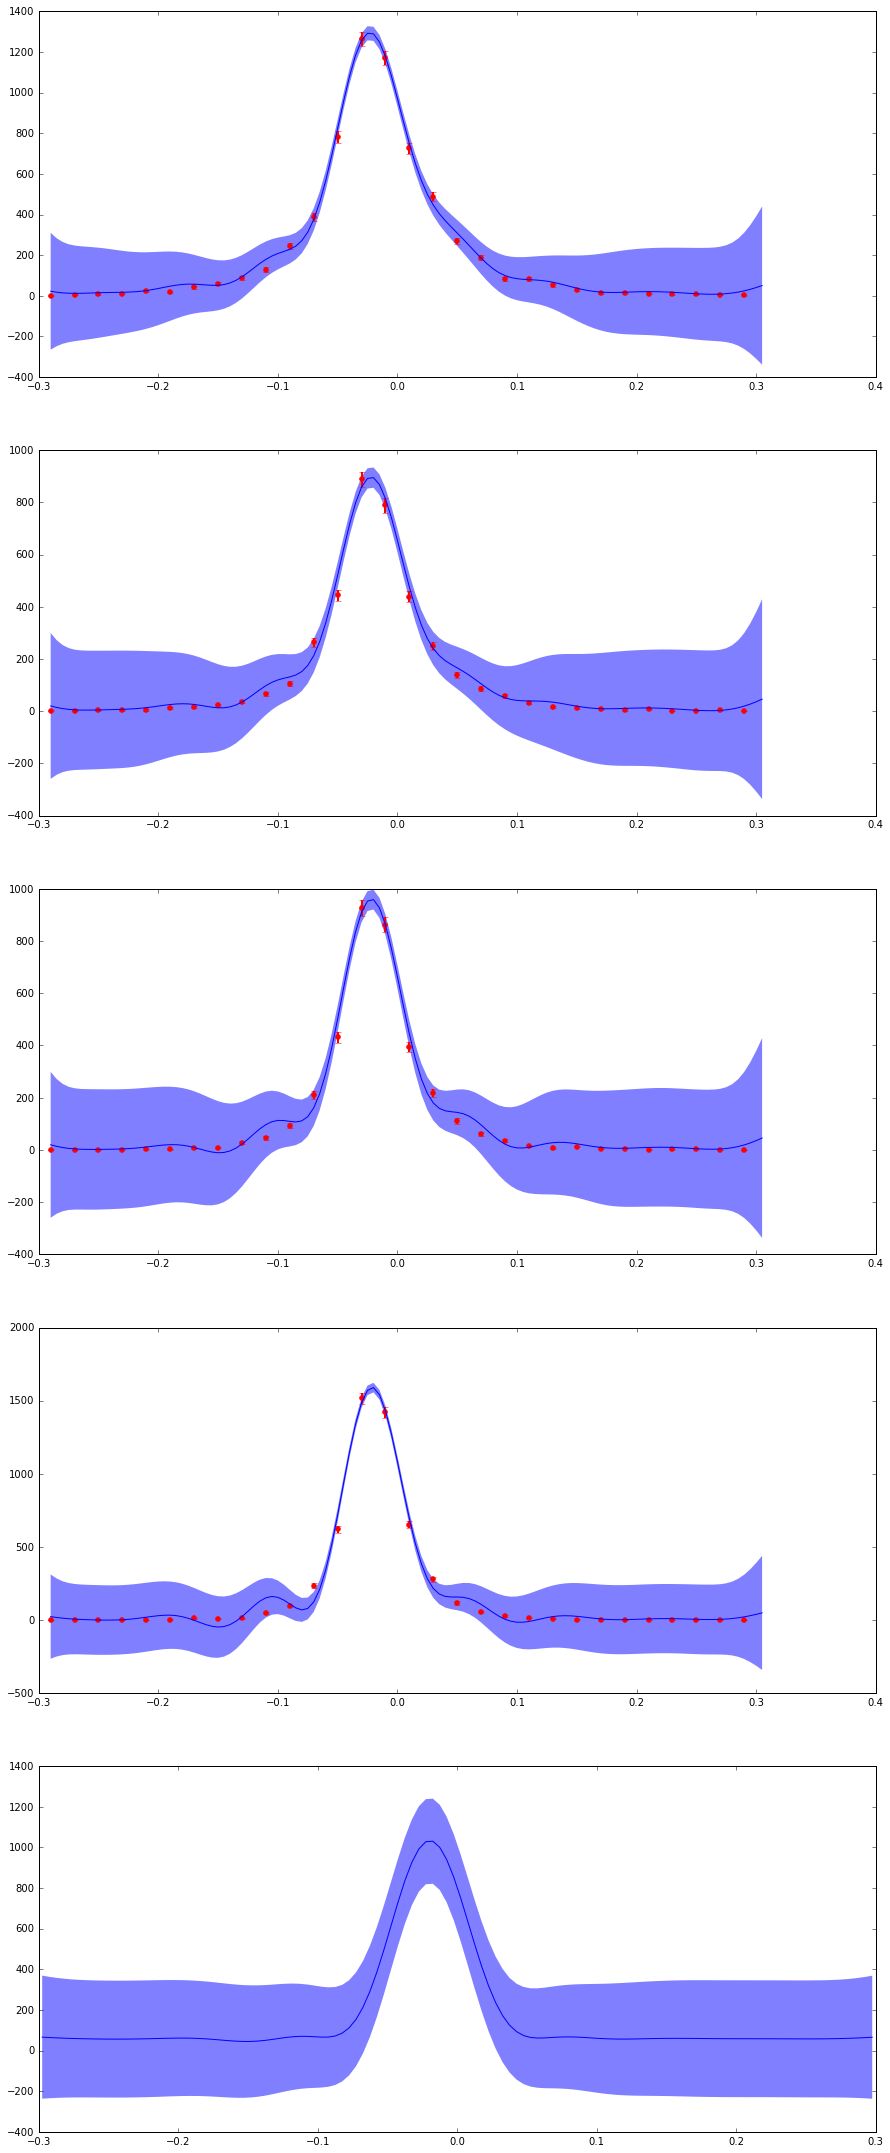

In [20]:
fig, ax = plt.subplots(5)
fig.set_figheight(38)
fig.set_figwidth(15)
ax[0].errorbar(df2.index.values, df2.values, np.sqrt(df2).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[0].plot(df2p)
ax[0].fill(np.concatenate([df2ps.index.values, df2ps.index.values[::-1]]),
              np.concatenate([df2p - 1.9600 * df2ps,
                       (df2p + 1.9600 * df2ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
ax[1].errorbar(df4.index.values, df4.values, np.sqrt(df4).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[1].plot(df4p)
ax[1].fill(np.concatenate([df4ps.index.values, df4ps.index.values[::-1]]),
              np.concatenate([df4p - 1.9600 * df4ps,
                       (df4p + 1.9600 * df4ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
ax[2].errorbar(df6.index.values, df6.values, np.sqrt(df6).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[2].plot(df6p)
ax[2].fill(np.concatenate([df6ps.index.values, df6ps.index.values[::-1]]),
              np.concatenate([df6p - 1.9600 * df6ps,
                       (df6p + 1.9600 * df6ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
ax[3].errorbar(df8.index.values, df8.values, np.sqrt(df8).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[3].plot(df8p)
ax[3].fill(np.concatenate([df8ps.index.values, df8ps.index.values[::-1]]),
              np.concatenate([df8p - 1.9600 * df8ps,
                       (df8p + 1.9600 * df8ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')


ax[4].plot(df9p)
ax[4].fill(np.concatenate([df9ps.index.values, df9ps.index.values[::-1]]),
              np.concatenate([df9p - 1.9600 * df9ps,
                       (df9p + 1.9600 * df9ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')